<a href="https://colab.research.google.com/github/singhsneha99/BDS_Predictive/blob/main/Evictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys,os
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive
Current working directory /content/drive/My Drive


LINEAR REGRESSION:

<ipython-input-9-d3b0ee303c64>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())


MAE by group:
group
1.0     0.100696
2.0     0.093871
3.0     0.065438
4.0     0.045276
5.0     0.076445
6.0     0.086883
7.0     0.060425
8.0     0.171284
9.0     0.099903
10.0    0.121538
11.0    0.210404
12.0    0.082653
13.0    0.089824
14.0    0.087703
15.0    0.078394
16.0    0.111388
dtype: float64
Overall MAE: 0.09630914358423352


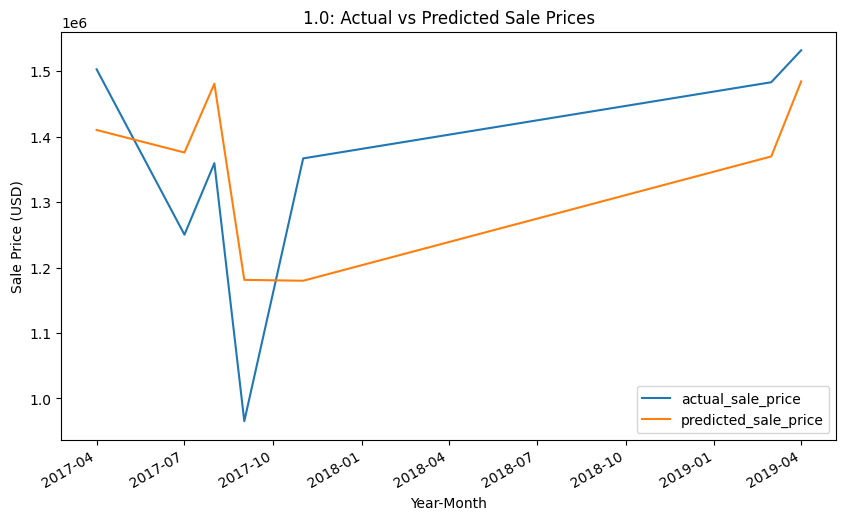

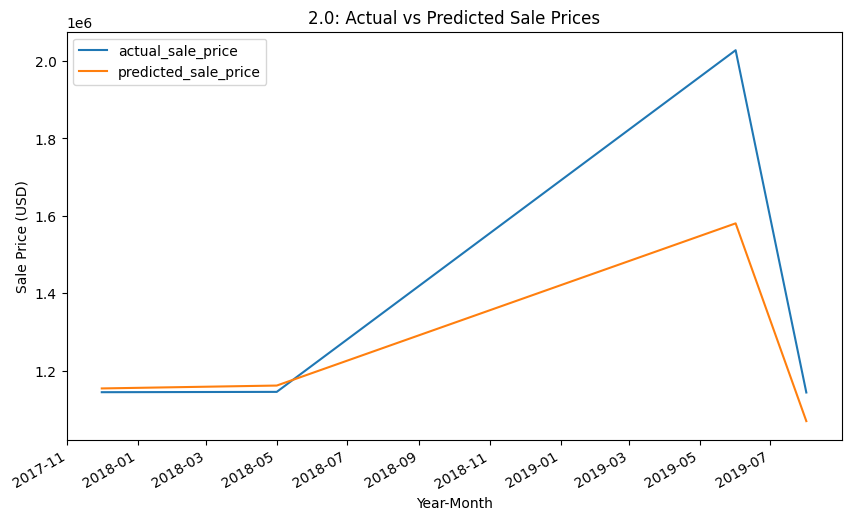

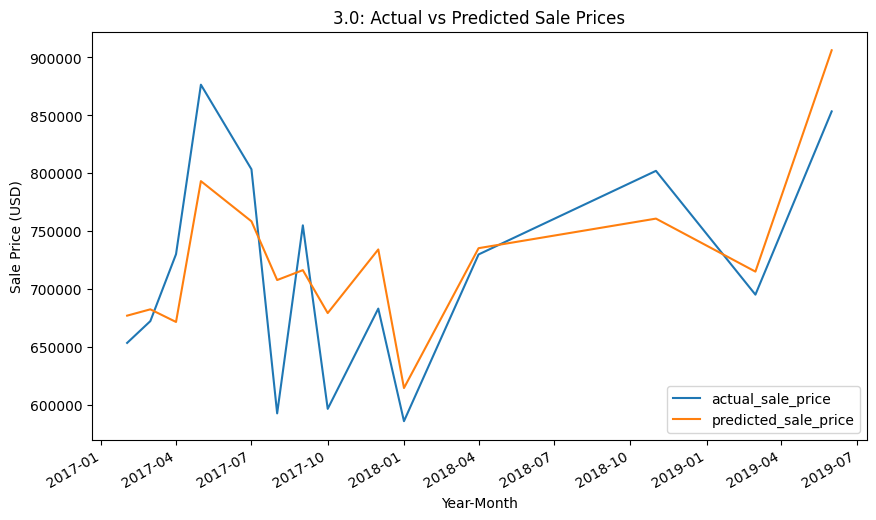

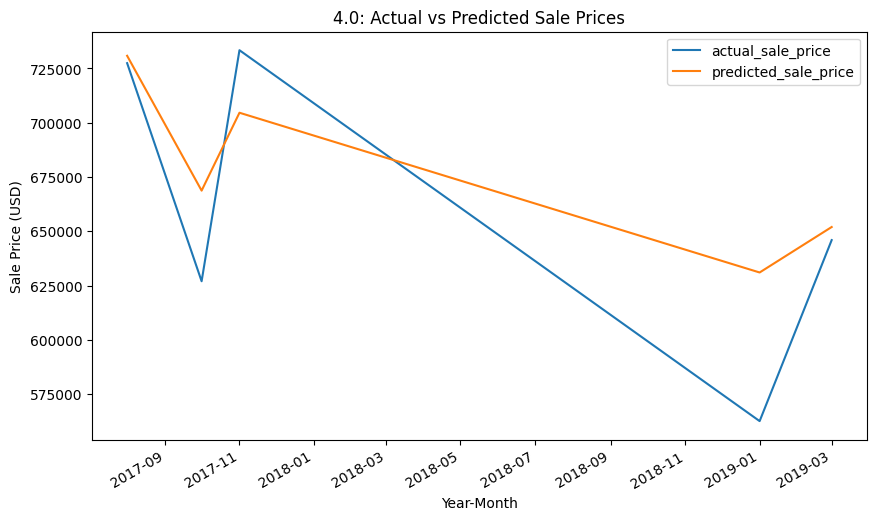

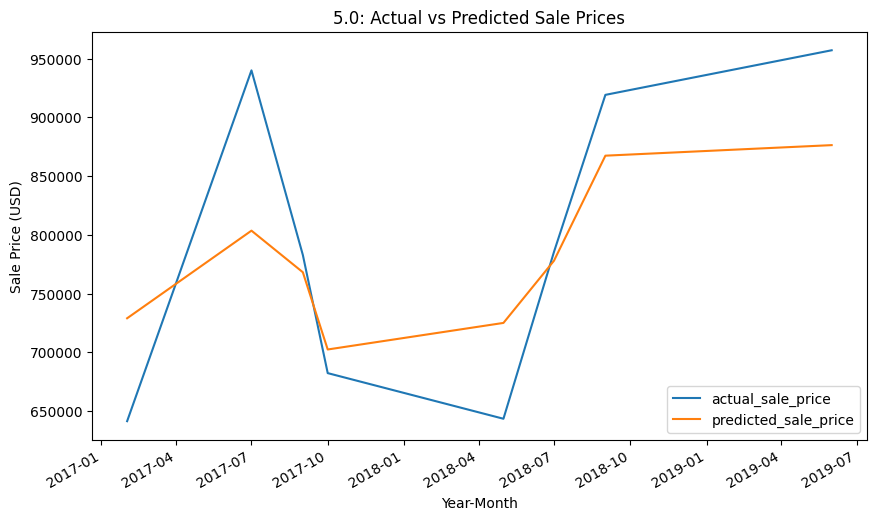

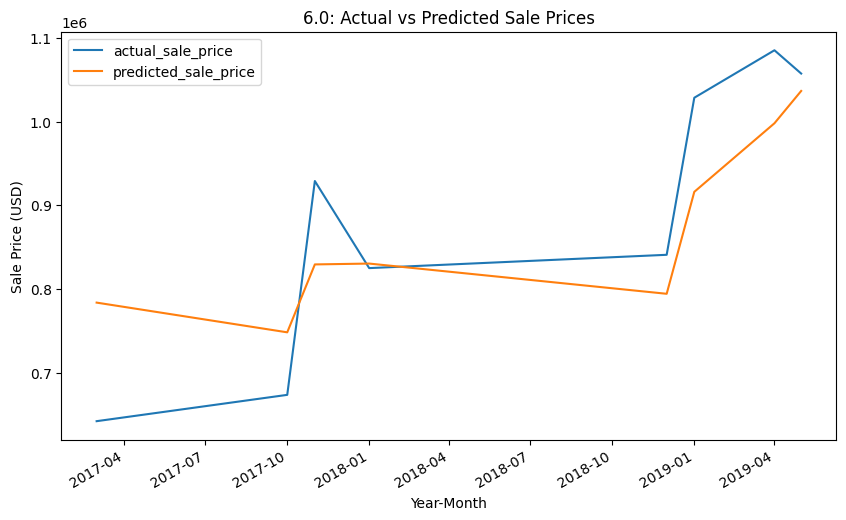

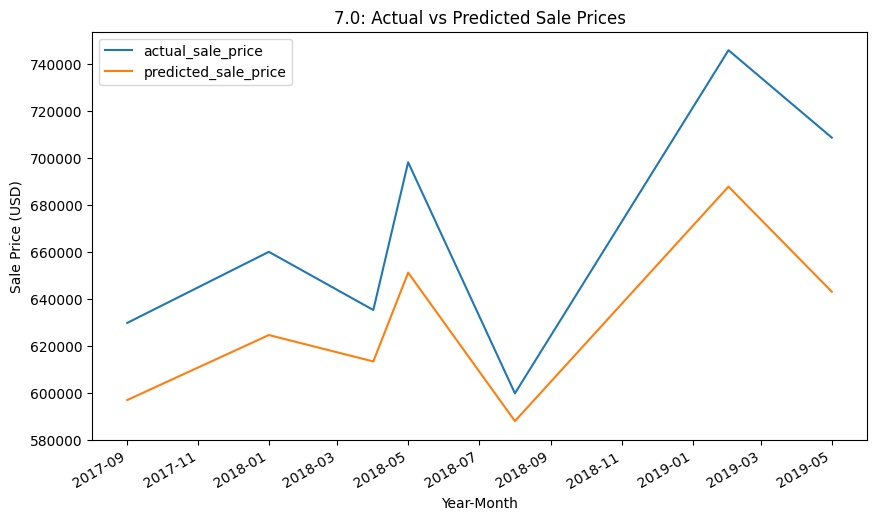

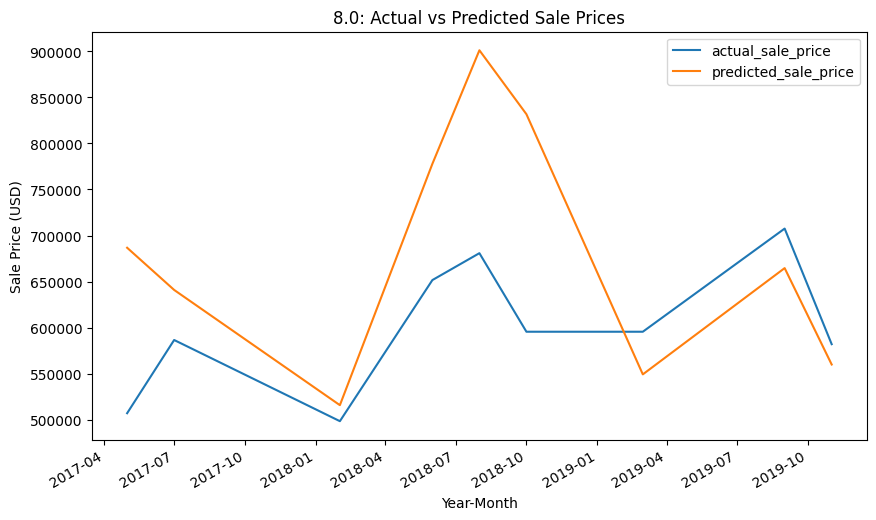

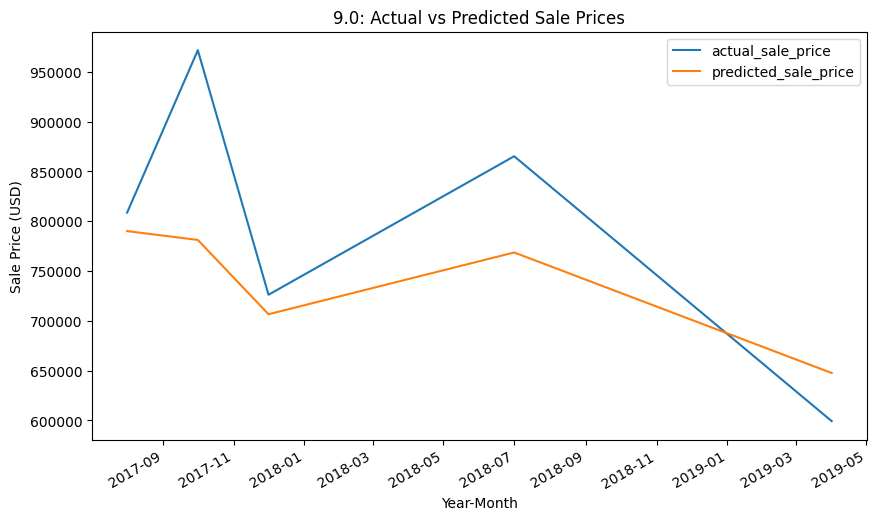

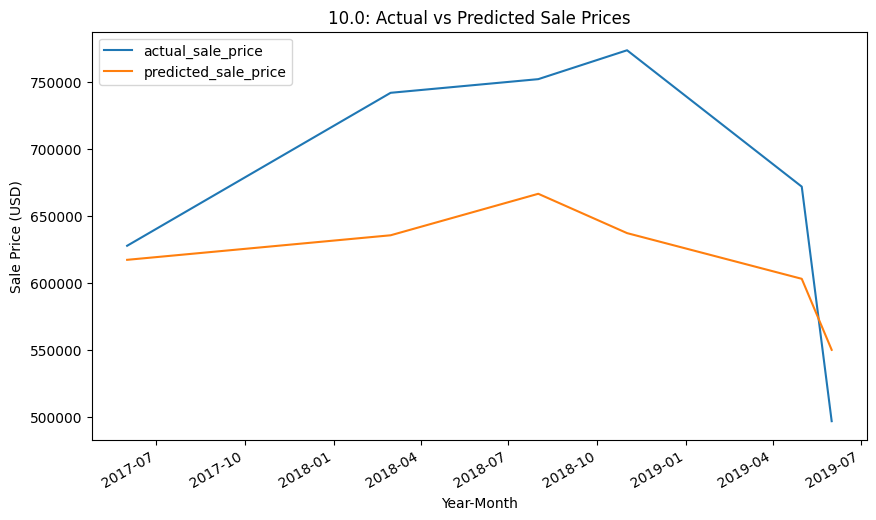

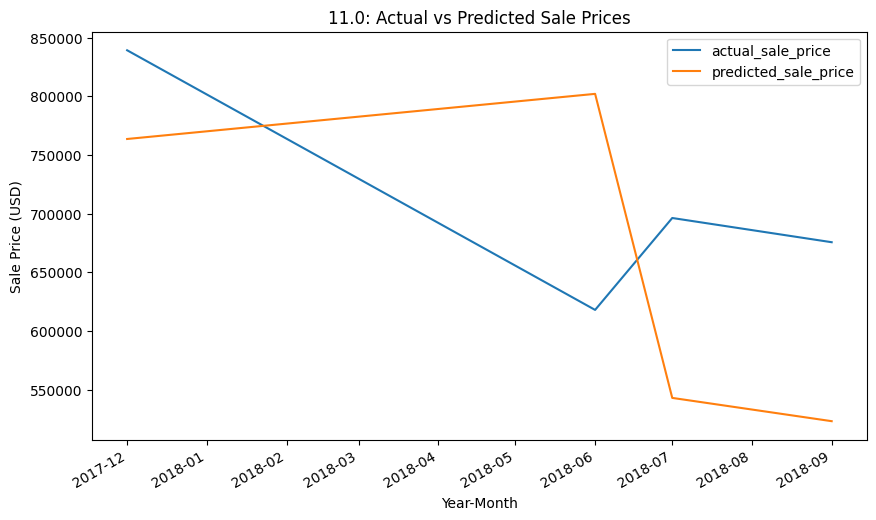

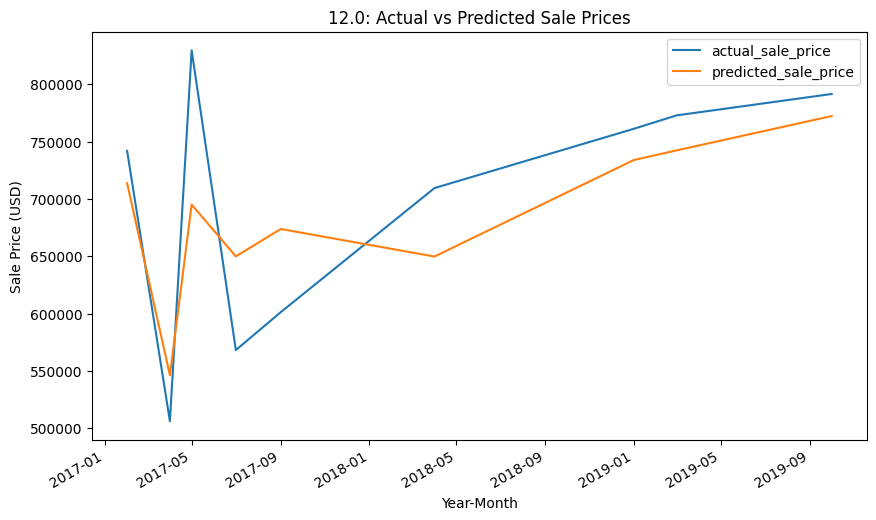

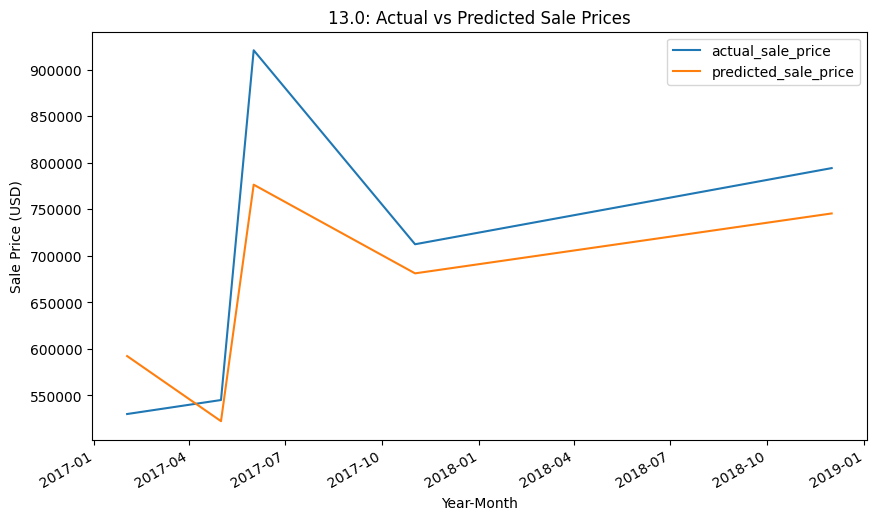

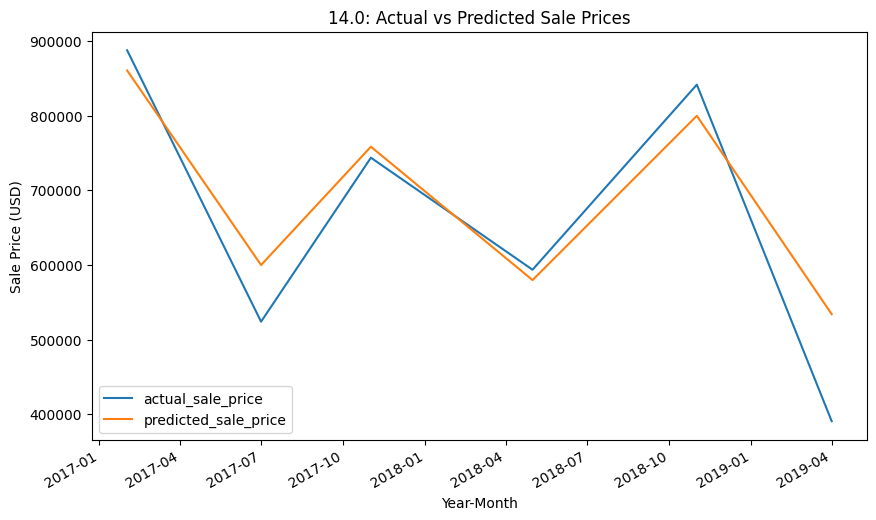

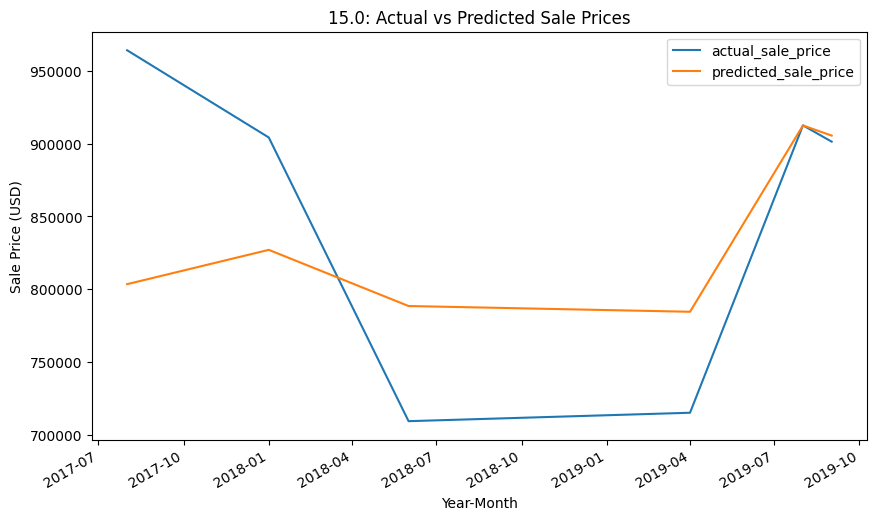

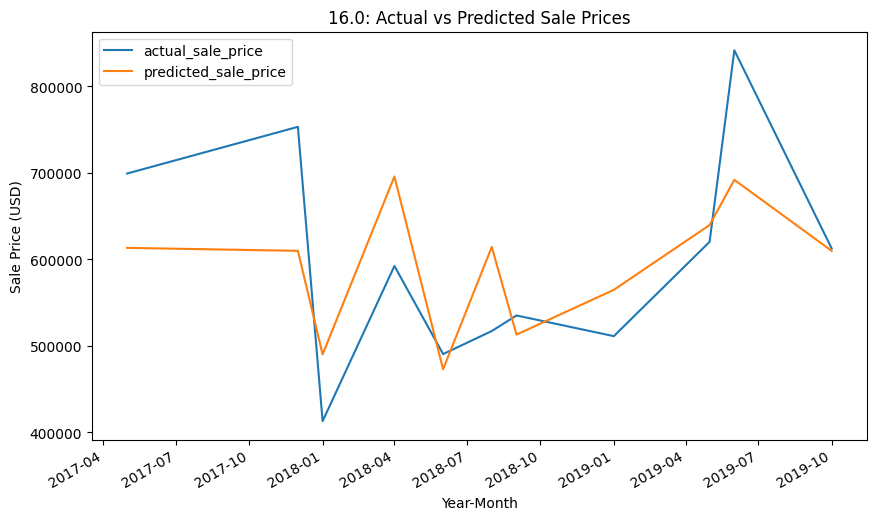

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('/content/drive/My Drive/TimeSeries_Data/Evictions_time_series.csv')

# Convert yr-month to a datetime object
df['yr-month'] = pd.to_datetime(df['yr-month'], format='%Y-%m')

# Calculate the percentage change in SALE_PRICE from the previous month
df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Drop any rows with missing values
train = train.dropna()
test = test.dropna()

# Fit linear regression model on the train set for each group
models = {}
for group, data in train.groupby('tract_1000_grp'):
    model = LinearRegression()
    X_train = data.drop(['tract_1000_grp', 'yr-month', 'SALE_PRICE', 'sale_price_pct_change'], axis=1)
    y_train = data['sale_price_pct_change']
    model.fit(X_train, y_train)
    models[group] = model

# Make predictions on the test set for each group
predictions = pd.DataFrame(columns=['group', 'yr-month', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change'])
for group, data in test.groupby('tract_1000_grp'):
    model = models[group]
    X_test = data.drop(['tract_1000_grp', 'yr-month', 'SALE_PRICE', 'sale_price_pct_change'], axis=1)
    y_test_pred = model.predict(X_test)
    data['predicted_sale_price_pct_change'] = y_test_pred
    data['actual_sale_price_pct_change'] = data['sale_price_pct_change']
    data['group'] = group
    predictions = pd.concat([predictions, data[['group', 'yr-month','SALE_PRICE', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change']]])
    
# Calculate the mean absolute error (MAE) of the predictions for each group
mae_by_group = predictions.groupby('group').apply(lambda x: abs(x['predicted_sale_price_pct_change'] - x['actual_sale_price_pct_change']).mean())

# Calculate the overall mean absolute error (MAE)
overall_mae = abs(predictions['predicted_sale_price_pct_change'] - predictions['actual_sale_price_pct_change']).mean()

# Print the performance metrics for each group and the overall MAE
print("MAE by group:")
print(mae_by_group)
print("Overall MAE:", overall_mae)

#print(predictions.head())
# Plot the predicted and actual sale prices for each group
for group, predictions in predictions.groupby('group', group_keys=False):
    predictions = predictions.set_index('yr-month')
    predictions['predicted_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['predicted_sale_price_pct_change'])
    predictions['actual_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['actual_sale_price_pct_change'])
    predictions[['actual_sale_price', 'predicted_sale_price']].plot(figsize=(10, 6))
    plt.title(f'{group}: Actual vs Predicted Sale Prices')
    plt.xlabel('Year-Month')
    plt.ylabel('Sale Price (USD)')
    plt.show()



LSTM:

ARIMA:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('/content/drive/My Drive/TimeSeries_Data/Evictions_time_series.csv')

# Convert yr-month to a datetime object
df['yr-month'] = pd.to_datetime(df['yr-month'], format='%Y-%m')

# Calculate the percentage change in SALE_PRICE from the previous month
df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Drop any rows with missing values
train = train.dropna()
test = test.dropna()


train.head()


<ipython-input-10-433214b30267>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())


,yr-month,tract_1000_grp,SALE_PRICE,counts_per_block,tract,sale_price_pct_change
437,2017-03-01,13.0,6.933765e+05,54,19.0,0.151734
63,2019-12-01,2.0,1.146140e+06,957,168.0,0.028833
208,2019-02-01,6.0,8.495658e+05,210,70.0,-0.071968
60,2019-01-01,2.0,1.092274e+06,877,360.0,-0.054625
15,2018-12-01,1.0,1.314659e+06,714,211.0,-0.062851


MAE by group:
group
1.0     0.072483
2.0     0.102524
3.0     0.064875
4.0     0.060784
5.0     0.069394
6.0     0.106495
7.0     0.040674
8.0     0.144703
9.0     0.113043
10.0    0.117868
11.0    0.077669
12.0    0.121849
13.0    0.095870
14.0    0.111061
15.0    0.069926
16.0    0.119619
dtype: float64
Overall MAE: 0.09372483877632201


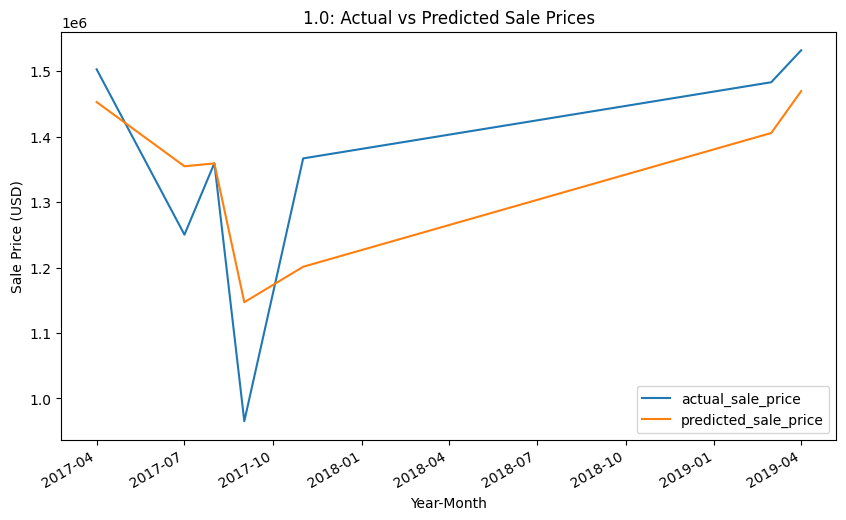

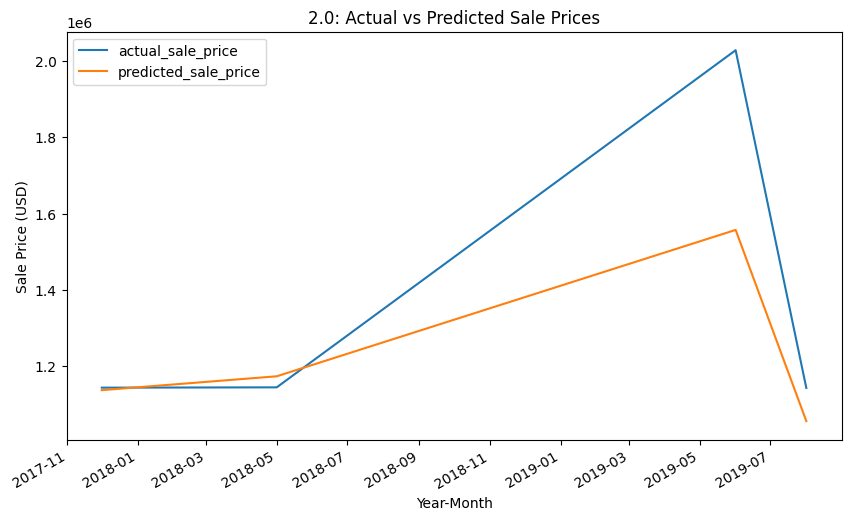

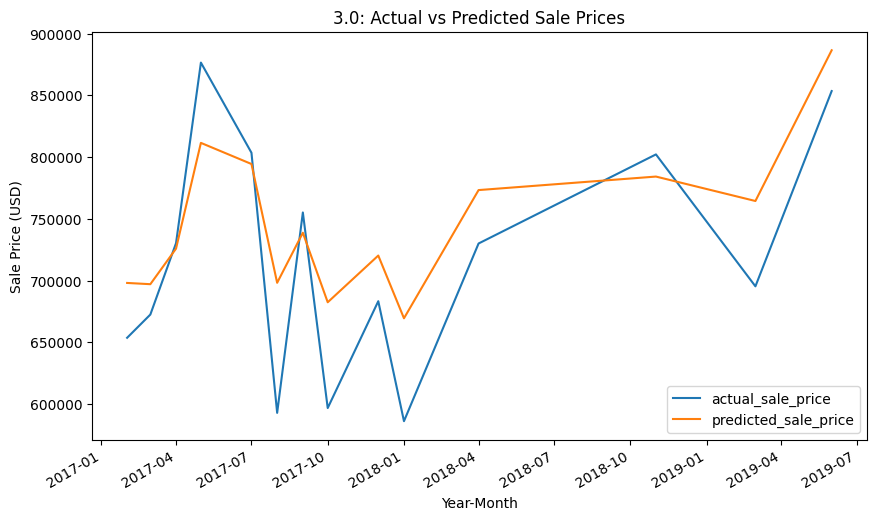

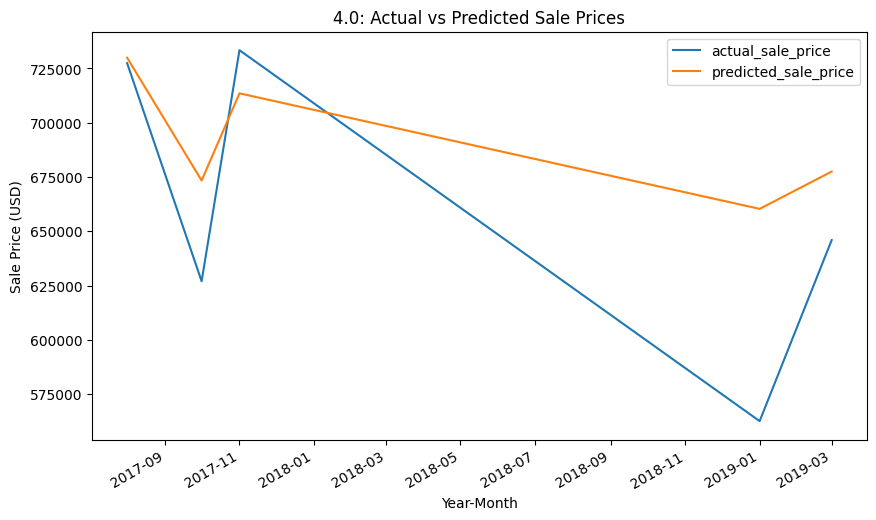

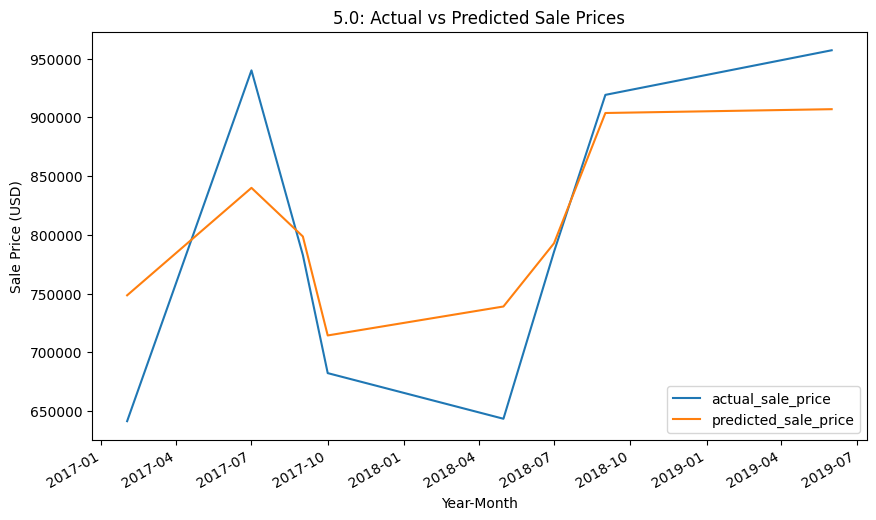

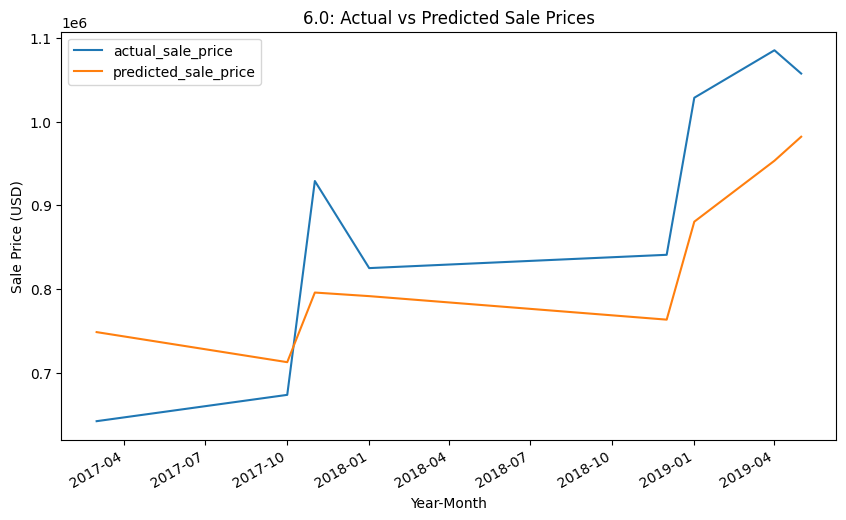

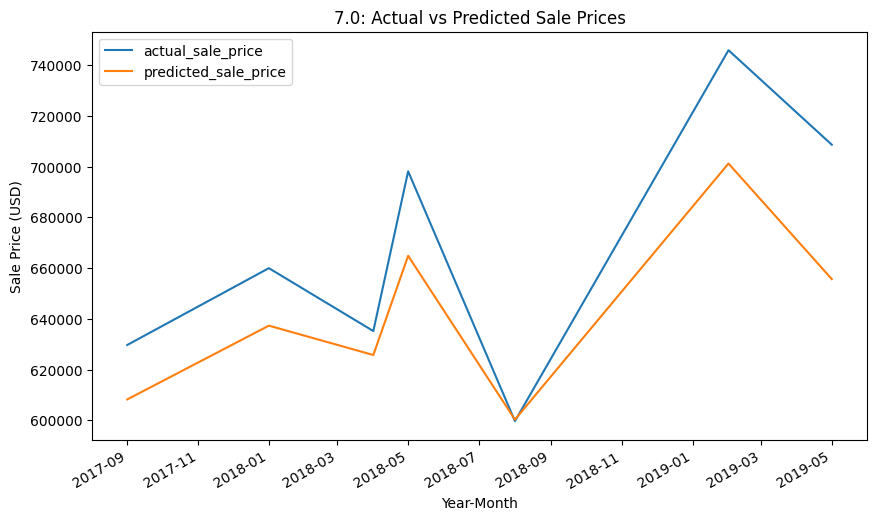

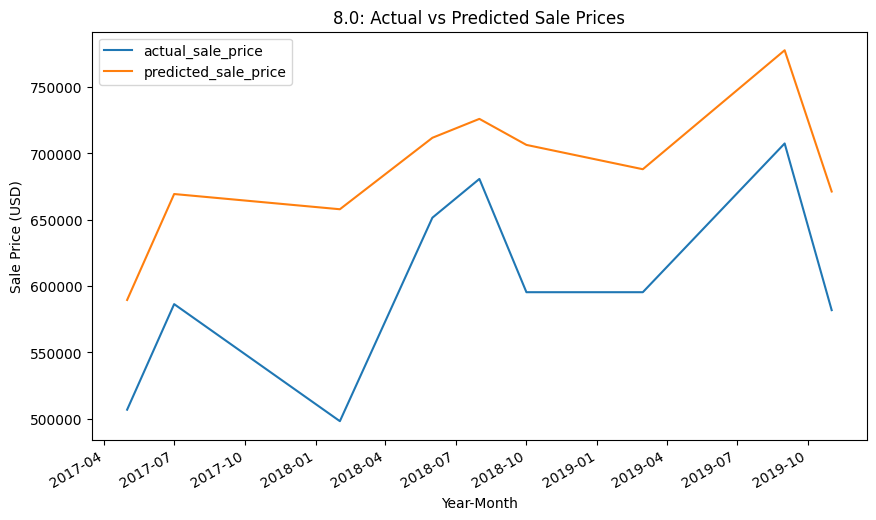

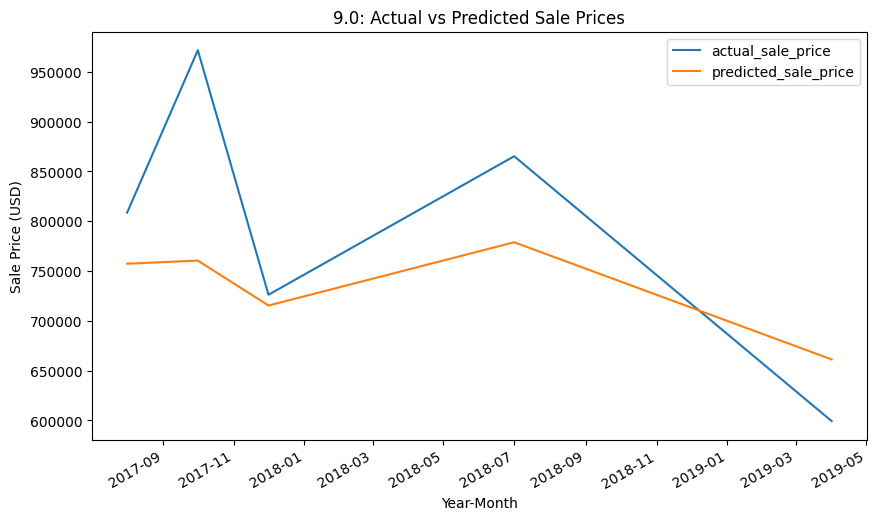

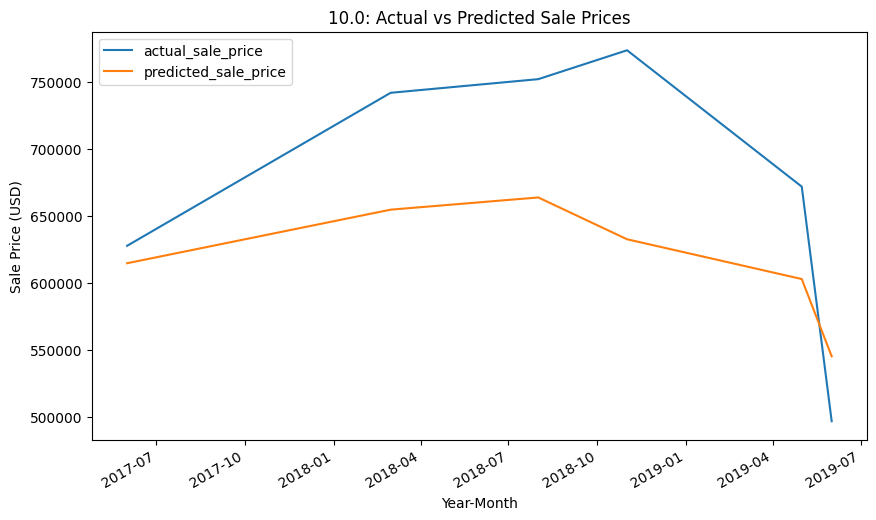

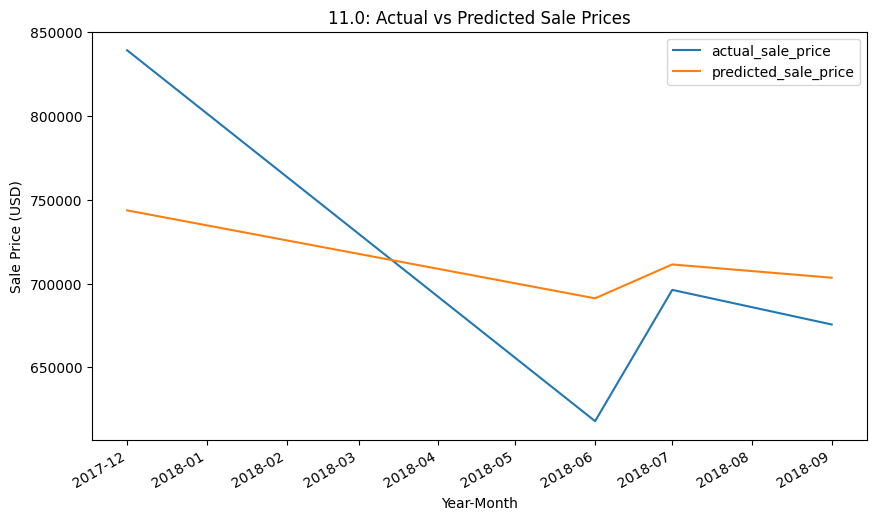

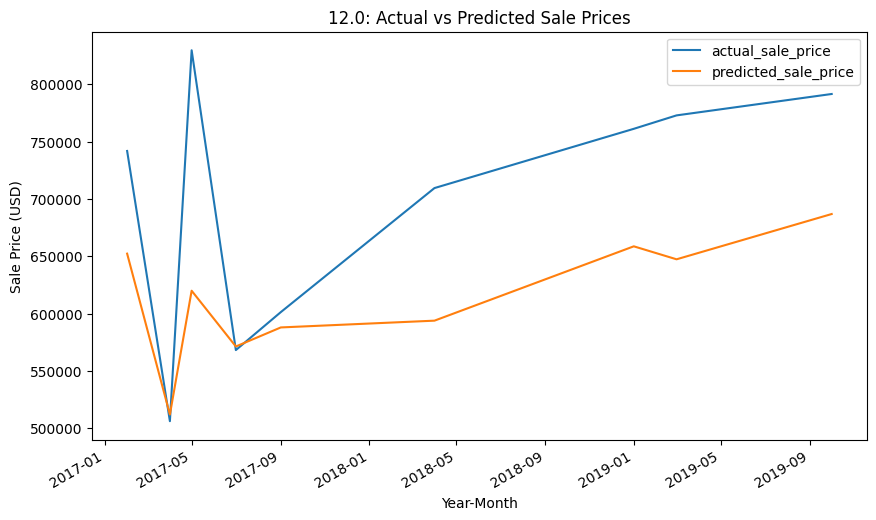

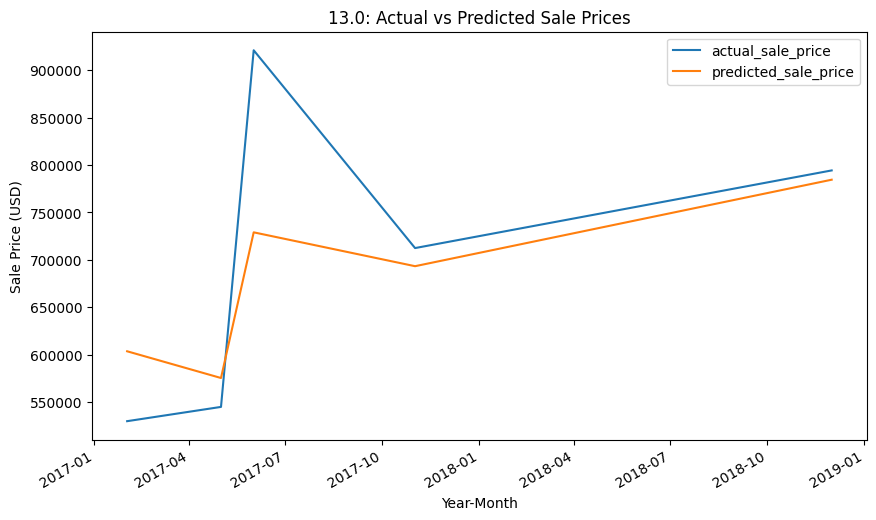

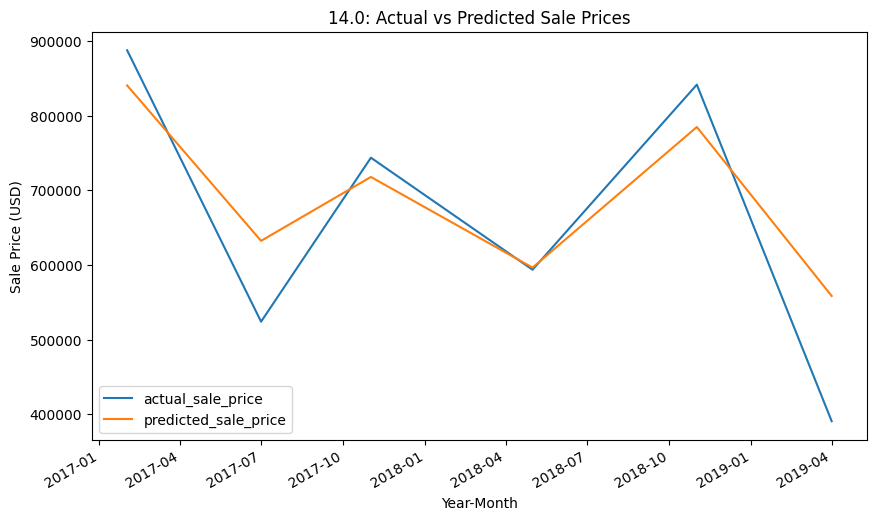

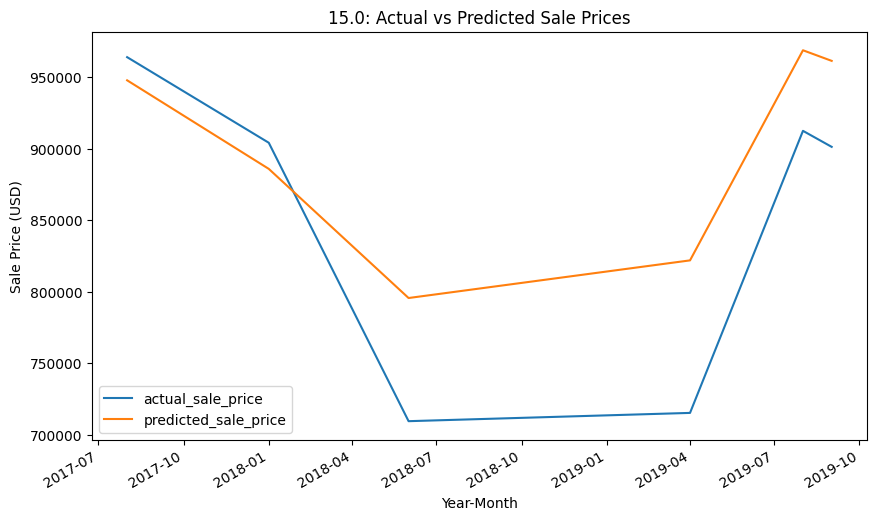

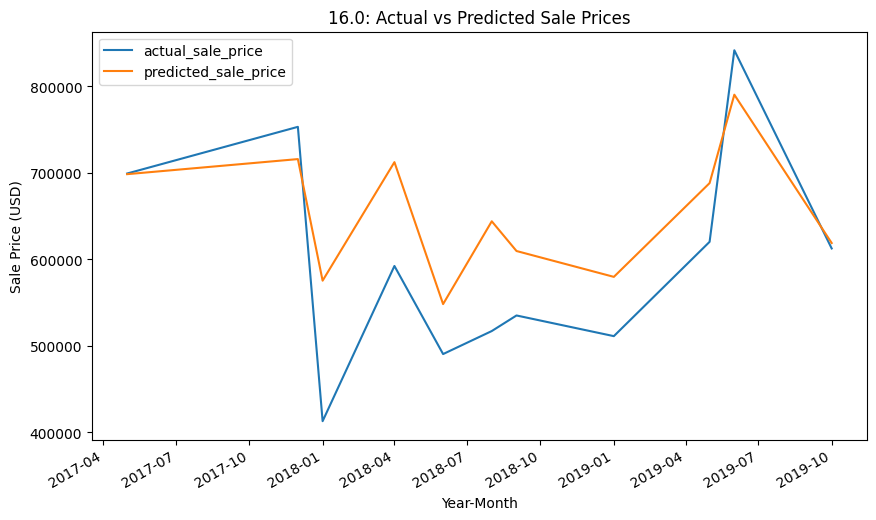

In [11]:
# Fit ARIMA model on the train set for each group
models = {}
for group, df in train.groupby('tract_1000_grp'):
    df = df.set_index('yr-month')
    # set frequency to Month Start (MS)
    df = df.asfreq('MS')
    model = ARIMA(df['sale_price_pct_change'], order=(1, 0, 0), freq=df.index.freq)  # pass frequency to ARIMA model
    model_fit = model.fit()
    models[group] = model_fit

# Make predictions on the test set for each group
predictions = pd.DataFrame(columns=['group', 'yr-month', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change'])
for group, data in test.groupby('tract_1000_grp'):
    model_fit = models[group]
    start_index = len(data)  # set the start index to the end of the training data
    end_index = start_index + len(data) - 1  # set the end index to the end of the test data
    y_test_pred, *_ = model_fit.forecast(steps=len(data)) # forecast future values
    data['predicted_sale_price_pct_change'] = y_test_pred
    data['actual_sale_price_pct_change'] = data['sale_price_pct_change']
    data['group'] = group
    predictions = pd.concat([predictions, data[['group', 'yr-month','SALE_PRICE', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change']]])

# Calculate the mean absolute error (MAE) of the predictions for each group
mae_by_group = predictions.groupby('group').apply(lambda x: abs(x['predicted_sale_price_pct_change'] - x['actual_sale_price_pct_change']).mean())

# Calculate the overall mean absolute error (MAE)
overall_mae = abs(predictions['predicted_sale_price_pct_change'] - predictions['actual_sale_price_pct_change']).mean()

# Print the performance metrics for each group and the overall MAE
print("MAE by group:")
print(mae_by_group)
print("Overall MAE:", overall_mae)

# Plot the predicted and actual sale prices for each group
for group, predictions in predictions.groupby('group', group_keys=False):
    predictions = predictions.set_index('yr-month')
    predictions['predicted_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['predicted_sale_price_pct_change'])
    predictions['actual_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['actual_sale_price_pct_change'])
    predictions[['actual_sale_price', 'predicted_sale_price']].plot(figsize=(10, 6))
    plt.title(f'{group}: Actual vs Predicted Sale Prices')
    plt.xlabel('Year-Month')
    plt.ylabel('Sale Price (USD)')
    plt.show()